In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from matplotlib import pyplot as plt

from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import gzip

import copy

import import_ipynb
from _My_Functions import null_cols, rmse

importing Jupyter notebook from _My_Functions.ipynb


In [2]:
acc_1_train_basicimputation = pd.read_csv("acc_1_train_basicimputation.csv.gz",
                                    compression='gzip',
                                    header=0,
                                    sep=',',
                                    quotechar='"')

target_1_train_basicimputation = pd.read_csv("target_1_train_basicimputation.csv.gz",
                                compression='gzip',
                                header=0,
                                sep=',',
                                quotechar='"')

acc_1_train_downsample = pd.read_csv("acc_1_train_downsample.csv.gz",
                                      compression='gzip',
                                      header=0,
                                      sep=',',
                                      quotechar='"')

acc_1_train_downsample_nogrades = pd.read_csv("acc_1_train_downsample_nogrades.csv.gz",
                                              compression='gzip',
                                              header=0,
                                              sep=',',
                                              quotechar='"')

target_1_train_downsample = pd.read_csv("target_1_train_downsample.csv.gz",
                                         compression='gzip',
                                         header=0,
                                         sep=',',
                                         quotechar='"')

In [3]:
# separate and drop 'total_pymnt'

ttlpy_1_train_basicimputation = copy.deepcopy(acc_1_train_basicimputation[['total_pymnt']])

acc_1_train_basicimputation = acc_1_train_basicimputation.drop('total_pymnt', axis=1)

acc_1_train_basicimputation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacat

In [4]:
ttlpy_1_train_downsample = copy.deepcopy(acc_1_train_downsample[['total_pymnt']])

acc_1_train_downsample = acc_1_train_downsample.drop('total_pymnt', axis=1)

acc_1_train_downsample

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacat

In [5]:
ttlpy_1_train_downsample_nogrades = copy.deepcopy(acc_1_train_downsample_nogrades[['total_pymnt']])

acc_1_train_downsample_nogrades = acc_1_train_downsample_nogrades.drop('total_pymnt', axis=1)

acc_1_train_downsample_nogrades

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedd

In [6]:
state=0

# basic imputation:
xtrain_b, xtest_b, ytrain_b, ytest_b = ms.train_test_split(acc_1_train_basicimputation,
                                                           target_1_train_basicimputation,
                                                           test_size=0.2,
                                                           random_state=state)

# Must flatten to fit
ytrain_b = ytrain_b.values.flatten()


# downsampled:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = ms.train_test_split(acc_1_train_downsample,
                                                               target_1_train_downsample,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_ds = ytrain_ds.values.flatten()


# No Grades:
xtrain_no, xtest_no, ytrain_no, ytest_no = ms.train_test_split(acc_1_train_downsample_nogrades,
                                                               target_1_train_downsample,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_no = ytrain_no.values.flatten()


# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

## Basic Imputation Data

In [7]:
xgb_clsfr = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']


gparam_xgb = {'objective': objective_,
              'eval_metric': evalmetric,
              'use_label_encoder': uselabelencoder,
              'tree_method': treemethod,
              'predictor': predictor_,
              'n_jobs': njobs,
              'booster': booster_,
              'random_state': randomstate}


gs_xgb = ms.GridSearchCV(xgb_clsfr, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb.fit(xtrain_b, ytrain_b)

# setting up dataframe for results
train_scores.append(gs_xgb.best_estimator_.score(xtrain_b, ytrain_b))
test_scores.append(gs_xgb.best_estimator_.score(xtest_b, ytest_b))

# add the best parameters to the df
best_par_list.append(gs_xgb.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_b, gs_xgb.predict(xtrain_b)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_b, gs_xgb.predict(xtest_b)))

res_df

Wall time: 30.9 s


confusion matrix for train set
[[423129   8238]
 [ 91384  16489]]


confusion matrix for test set
[[105301   2702]
 [ 23567   3240]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.815255,0.805141,0.42982,0.441429,-0.011609,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


In [8]:
sorted_importance = sorted(zip(xtrain_b.columns,
                               gs_xgb.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance

[('sub_grade', 0.20933445),
 ('grade', 0.13189213),
 ('term', 0.027215362),
 ('home_ownership_RENT', 0.016524792),
 ('verification_status', 0.015650481),
 ('issue_d_Nov-2018', 0.0116691375),
 ('issue_d_Aug-2018', 0.009984624),
 ('funded_amnt', 0.00996166),
 ('issue_d_Oct-2018', 0.00995247),
 ('issue_d_Sep-2018', 0.009907229),
 ('acc_open_past_24mths', 0.009425969),
 ('issue_d_Dec-2018', 0.008993394),
 ('issue_d_Feb-2016', 0.008706478),
 ('all_util', 0.008576585),
 ('open_act_il', 0.0077098403),
 ('home_ownership_MORTGAGE', 0.00756195),
 ('purpose_small_business', 0.007442798),
 ('mort_acc', 0.007349568),
 ('emp_length', 0.0072636446),
 ('issue_d_Jan-2016', 0.007131376),
 ('issue_d_Jul-2018', 0.0068061603),
 ('num_actv_rev_tl', 0.0065934868),
 ('issue_d_Oct-2013', 0.006386347),
 ('dti', 0.006004167),
 ('avg_cur_bal', 0.005786177),
 ('initial_list_status_w', 0.005527723),
 ('installment', 0.0054072896),
 ('issue_d_Apr-2016', 0.0052822386),
 ('issue_d_Mar-2014', 0.0052528176),
 ('issue_d_

In [9]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_b, gs_xgb.predict(xtest_b))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.24


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.24')

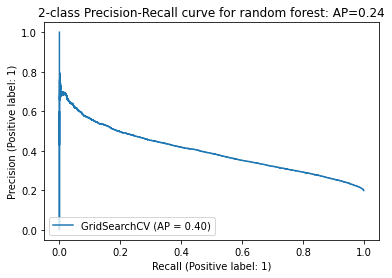

In [10]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb, xtest_b, ytest_b)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [11]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_b, gs_xgb.predict(xtest_b))
recall_score = metrics.recall_score(ytest_b, gs_xgb.predict(xtest_b))
precision_score = metrics.precision_score(ytest_b, gs_xgb.predict(xtest_b))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.20
recall score: 0.12
precision score: 0.55


In [12]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_b, gs_xgb.predict(xtest_b))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.5479230649330106

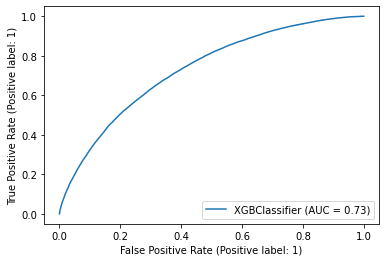

In [13]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb.best_estimator_, xtest_b, ytest_b) 

## Downsampled Data

In [14]:
xgb_clsfr_ds = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']


gparam_xgb_ds = {'objective': objective_,
                 'eval_metric': evalmetric,
                 'use_label_encoder': uselabelencoder,
                 'tree_method': treemethod,
                 'predictor': predictor_,
                 'n_jobs': njobs,
                 'booster': booster_,
                 'random_state': randomstate}


gs_xgb_ds = ms.GridSearchCV(xgb_clsfr_ds, gparam_xgb_ds, cv=n_folds, refit=True,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb_ds.fit(xtrain_ds, ytrain_ds)

# setting up dataframe for results
train_scores.append(gs_xgb_ds.best_estimator_.score(xtrain_ds, ytrain_ds))
test_scores.append(gs_xgb_ds.best_estimator_.score(xtest_ds, ytest_ds))

# add the best parameters to the df
best_par_list.append(gs_xgb_ds.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_ds, gs_xgb_ds.predict(xtrain_ds)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_ds, gs_xgb_ds.predict(xtest_ds)))

res_df

Wall time: 13.8 s


confusion matrix for train set
[[75012 32698]
 [30168 77610]]


confusion matrix for test set
[[17512  9458]
 [ 8608 18294]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.708262,0.66465,0.540128,0.579095,-0.038967,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


In [15]:
sorted_importance_ds = sorted(zip(xtrain_ds.columns,
                               gs_xgb_ds.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance_ds

[('grade', 0.27501813),
 ('sub_grade', 0.12722045),
 ('term', 0.023521848),
 ('home_ownership_RENT', 0.011637009),
 ('open_act_il', 0.011351699),
 ('home_ownership_MORTGAGE', 0.010904598),
 ('purpose_small_business', 0.0096270945),
 ('all_util', 0.008692685),
 ('issue_d_Oct-2018', 0.00858223),
 ('issue_d_Nov-2018', 0.0076809316),
 ('issue_d_Aug-2018', 0.007620723),
 ('acc_open_past_24mths', 0.0069535105),
 ('mort_acc', 0.0068256506),
 ('issue_d_Sep-2018', 0.006413744),
 ('issue_d_Dec-2018', 0.006325533),
 ('emp_length', 0.0061081885),
 ('issue_d_Nov-2013', 0.0060938853),
 ('issue_d_May-2016', 0.0060507394),
 ('avg_cur_bal', 0.0059607844),
 ('issue_d_Feb-2016', 0.0056339176),
 ('funded_amnt', 0.005434932),
 ('num_actv_rev_tl', 0.0053570503),
 ('fico_score', 0.005159675),
 ('dti', 0.0051530176),
 ('issue_d_Jan-2016', 0.0049794065),
 ('loan_amnt', 0.0047752406),
 ('issue_d_May-2018', 0.0047242423),
 ('int_rate', 0.0045666094),
 ('issue_d_Apr-2016', 0.004548148),
 ('issue_d_Jan-2014', 0.00

Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.24')

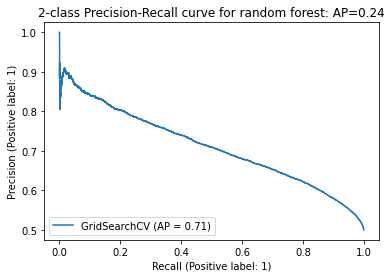

In [16]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb_ds, xtest_ds, ytest_ds)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [17]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
recall_score = metrics.recall_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
precision_score = metrics.precision_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.67
recall score: 0.68
precision score: 0.66


In [18]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.664668921351939

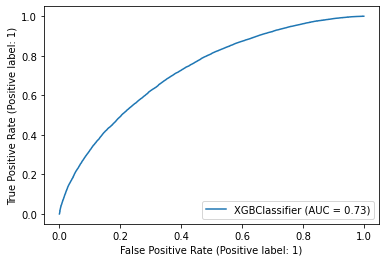

In [19]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb_ds.best_estimator_, xtest_ds, ytest_ds) 

In [20]:
filtered_sorted_importance = [x for x in sorted_importance if x[1]>0.0035]
filtered_sorted_importance

[('sub_grade', 0.20933445),
 ('grade', 0.13189213),
 ('term', 0.027215362),
 ('home_ownership_RENT', 0.016524792),
 ('verification_status', 0.015650481),
 ('issue_d_Nov-2018', 0.0116691375),
 ('issue_d_Aug-2018', 0.009984624),
 ('funded_amnt', 0.00996166),
 ('issue_d_Oct-2018', 0.00995247),
 ('issue_d_Sep-2018', 0.009907229),
 ('acc_open_past_24mths', 0.009425969),
 ('issue_d_Dec-2018', 0.008993394),
 ('issue_d_Feb-2016', 0.008706478),
 ('all_util', 0.008576585),
 ('open_act_il', 0.0077098403),
 ('home_ownership_MORTGAGE', 0.00756195),
 ('purpose_small_business', 0.007442798),
 ('mort_acc', 0.007349568),
 ('emp_length', 0.0072636446),
 ('issue_d_Jan-2016', 0.007131376),
 ('issue_d_Jul-2018', 0.0068061603),
 ('num_actv_rev_tl', 0.0065934868),
 ('issue_d_Oct-2013', 0.006386347),
 ('dti', 0.006004167),
 ('avg_cur_bal', 0.005786177),
 ('initial_list_status_w', 0.005527723),
 ('installment', 0.0054072896),
 ('issue_d_Apr-2016', 0.0052822386),
 ('issue_d_Mar-2014', 0.0052528176),
 ('issue_d_

In [21]:
# get list of column names for easier application in the future
filter_important = []
for tup in filtered_sorted_importance:
    filter_important.append(tup[0])

filter_important

['sub_grade',
 'grade',
 'term',
 'home_ownership_RENT',
 'verification_status',
 'issue_d_Nov-2018',
 'issue_d_Aug-2018',
 'funded_amnt',
 'issue_d_Oct-2018',
 'issue_d_Sep-2018',
 'acc_open_past_24mths',
 'issue_d_Dec-2018',
 'issue_d_Feb-2016',
 'all_util',
 'open_act_il',
 'home_ownership_MORTGAGE',
 'purpose_small_business',
 'mort_acc',
 'emp_length',
 'issue_d_Jan-2016',
 'issue_d_Jul-2018',
 'num_actv_rev_tl',
 'issue_d_Oct-2013',
 'dti',
 'avg_cur_bal',
 'initial_list_status_w',
 'installment',
 'issue_d_Apr-2016',
 'issue_d_Mar-2014',
 'issue_d_Mar-2016',
 'issue_d_Jun-2016',
 'fico_score',
 'funded_amnt_inv',
 'issue_d_May-2016',
 'purpose_medical',
 'annual_inc',
 'issue_d_Jul-2015',
 'issue_d_Aug-2015',
 'issue_d_Nov-2015',
 'tot_hi_cred_lim',
 'int_rate',
 'issue_d_Jul-2016',
 'issue_d_Dec-2015',
 'issue_d_Aug-2016',
 'issue_d_Sep-2015',
 'issue_d_Dec-2013',
 'loan_amnt',
 'issue_d_Feb-2013',
 'mths_since_recent_inq',
 'total_bc_limit',
 'mths_since_recent_bc',
 'delinq_2

# No Grades

In [22]:
xgb_clsfr_no = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']

# nestimators = [100]
# minchildweight = [1, 5]
# maxdepth = [1, 3]
# learningrate = [0.1, 1]
# gamma_ = [0.5, 2]
# subsample_ = [0.8, 1]
# colsamplebytree = [0.8, 1]


gparam_xgb_no = {'objective': objective_,
                 'eval_metric': evalmetric,
                 'use_label_encoder': uselabelencoder,
                 'tree_method': treemethod,
                 'predictor': predictor_,
                 'n_jobs': njobs,
                 'booster': booster_,
#               'n_estimators': nestimators,
#               'min_child_weight': minchildweight,
#               'max_depth': maxdepth,
#               'learning_rate': learningrate,
#               'gamma': gamma_,
#               'subsample': subsample_,
#               'colsample_bytree': colsamplebytree,
                 'random_state': randomstate}


gs_xgb_no = ms.GridSearchCV(xgb_clsfr_no, gparam_xgb_no, cv=n_folds, refit=True,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb_no.fit(xtrain_no, ytrain_no)

# setting up dataframe for results
train_scores.append(gs_xgb_no.best_estimator_.score(xtrain_no, ytrain_no))
test_scores.append(gs_xgb_no.best_estimator_.score(xtest_no, ytest_no))

# add the best parameters to the df
best_par_list.append(gs_xgb_no.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_no, gs_xgb_no.predict(xtrain_no)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_no, gs_xgb_no.predict(xtest_no)))

res_df

Wall time: 13.8 s


confusion matrix for train set
[[75062 32648]
 [29894 77884]]


confusion matrix for test set
[[17494  9476]
 [ 8656 18246]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.709766,0.663424,0.538734,0.580151,-0.041417,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


- Performed similarly to dataset with grades

In [23]:
sorted_importance_no = sorted(zip(xtrain_no.columns,
                               gs_xgb_no.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance_no

[('int_rate', 0.10311238),
 ('term', 0.039124187),
 ('home_ownership_RENT', 0.021753386),
 ('funded_amnt', 0.019135667),
 ('open_act_il', 0.016598117),
 ('purpose_small_business', 0.013368814),
 ('issue_d_Aug-2018', 0.0124766445),
 ('issue_d_Oct-2018', 0.012270935),
 ('issue_d_Nov-2018', 0.012039559),
 ('all_util', 0.011444937),
 ('home_ownership_MORTGAGE', 0.011318723),
 ('issue_d_May-2016', 0.011141081),
 ('issue_d_Sep-2018', 0.011135128),
 ('acc_open_past_24mths', 0.01099685),
 ('fico_score', 0.009791779),
 ('mort_acc', 0.009206509),
 ('issue_d_Dec-2018', 0.009089605),
 ('emp_length', 0.0087597575),
 ('avg_cur_bal', 0.008617346),
 ('issue_d_Oct-2013', 0.007984077),
 ('issue_d_Apr-2016', 0.00769332),
 ('num_actv_rev_tl', 0.007640958),
 ('verification_status', 0.0073956307),
 ('issue_d_Jul-2018', 0.0073479963),
 ('dti', 0.0071969274),
 ('issue_d_Nov-2013', 0.0070022917),
 ('issue_d_Jan-2014', 0.006681591),
 ('issue_d_Jul-2013', 0.0066386205),
 ('issue_d_Jun-2016', 0.0066014347),
 ('is

Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.24')

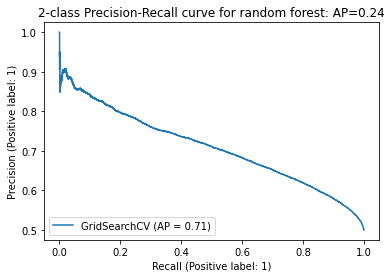

In [24]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb_no, xtest_no, ytest_no)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [25]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_no, gs_xgb_no.predict(xtest_no))
recall_score = metrics.recall_score(ytest_no, gs_xgb_no.predict(xtest_no))
precision_score = metrics.precision_score(ytest_no, gs_xgb_no.predict(xtest_no))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.67
recall score: 0.68
precision score: 0.66


In [26]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_no, gs_xgb_no.predict(xtest_no))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6634430902568481

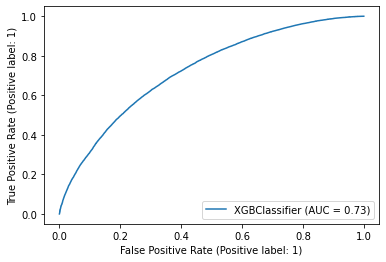

In [27]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb_no.best_estimator_, xtest_no, ytest_no) 

In [28]:
filtered_sorted_importance_no = [x for x in sorted_importance_no if x[1]>0.0035]
filtered_sorted_importance_no

[('int_rate', 0.10311238),
 ('term', 0.039124187),
 ('home_ownership_RENT', 0.021753386),
 ('funded_amnt', 0.019135667),
 ('open_act_il', 0.016598117),
 ('purpose_small_business', 0.013368814),
 ('issue_d_Aug-2018', 0.0124766445),
 ('issue_d_Oct-2018', 0.012270935),
 ('issue_d_Nov-2018', 0.012039559),
 ('all_util', 0.011444937),
 ('home_ownership_MORTGAGE', 0.011318723),
 ('issue_d_May-2016', 0.011141081),
 ('issue_d_Sep-2018', 0.011135128),
 ('acc_open_past_24mths', 0.01099685),
 ('fico_score', 0.009791779),
 ('mort_acc', 0.009206509),
 ('issue_d_Dec-2018', 0.009089605),
 ('emp_length', 0.0087597575),
 ('avg_cur_bal', 0.008617346),
 ('issue_d_Oct-2013', 0.007984077),
 ('issue_d_Apr-2016', 0.00769332),
 ('num_actv_rev_tl', 0.007640958),
 ('verification_status', 0.0073956307),
 ('issue_d_Jul-2018', 0.0073479963),
 ('dti', 0.0071969274),
 ('issue_d_Nov-2013', 0.0070022917),
 ('issue_d_Jan-2014', 0.006681591),
 ('issue_d_Jul-2013', 0.0066386205),
 ('issue_d_Jun-2016', 0.0066014347),
 ('is

In [29]:
# get list of column names for easier application in the future
filter_important = []
for tup in filtered_sorted_importance_no:
    filter_important.append(tup[0])

filter_important

['int_rate',
 'term',
 'home_ownership_RENT',
 'funded_amnt',
 'open_act_il',
 'purpose_small_business',
 'issue_d_Aug-2018',
 'issue_d_Oct-2018',
 'issue_d_Nov-2018',
 'all_util',
 'home_ownership_MORTGAGE',
 'issue_d_May-2016',
 'issue_d_Sep-2018',
 'acc_open_past_24mths',
 'fico_score',
 'mort_acc',
 'issue_d_Dec-2018',
 'emp_length',
 'avg_cur_bal',
 'issue_d_Oct-2013',
 'issue_d_Apr-2016',
 'num_actv_rev_tl',
 'verification_status',
 'issue_d_Jul-2018',
 'dti',
 'issue_d_Nov-2013',
 'issue_d_Jan-2014',
 'issue_d_Jul-2013',
 'issue_d_Jun-2016',
 'issue_d_Dec-2013',
 'sec_app_inq_last_6mths',
 'issue_d_Mar-2018',
 'purpose_medical',
 'issue_d_Aug-2017',
 'collections_12_mths_ex_med',
 'issue_d_Dec-2012',
 'issue_d_May-2018',
 'issue_d_Sep-2010',
 'issue_d_Aug-2013',
 'issue_d_Sep-2013',
 'issue_d_Mar-2014',
 'issue_d_Jan-2013',
 'funded_amnt_inv',
 'sec_app_revol_util',
 'issue_d_Jan-2016',
 'issue_d_Feb-2015',
 'initial_list_status_w',
 'delinq_2yrs',
 'annual_inc',
 'tot_hi_cred_l